<a href="https://colab.research.google.com/github/kylefrankel/preprocessinganalysis/blob/main/Preprocessing_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing and Analysis


In [ ]:
#3. Add code to import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
%matplotlib inline

In [ ]:
#4. Add code to read in the data file and display the first few records.
file_link = 'https://drive.google.com/uc?export=download&id=1oQMcpoR3QC7w_sWIbtyid2N2j0o49_pk'
df = pd.read_csv(file_link)
df.head(6)

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
5,ID12106,57,37869.6,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES


In [ ]:
# What is the min, max, and average for age, income, and children?
df.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


5 a. The min for age is 18, it's max is 67, and the average age is 42.4. For Income, the min is $5014.12, the max is $63130.1, and the mean is $27,524.03. Lastly, the min for number of children is 0, the max is 3, and the average is 1.01. 

In [ ]:
#How many customers own a car?
cars = df['car']
count = cars.str.count("YES")
print(sum(count))

296


5 b. 296 customers own cars

In [ ]:
#Of the 4 regions, in which one do people have the highest average number of children?
df.groupby(['region']).mean()

,age,income,children
region,,,
INNER_CITY,41.992565,26843.999963,0.951673
RURAL,43.010417,30027.605417,1.229167
SUBURBAN,43.725806,28656.356935,0.967742
TOWN,42.202312,26786.349653,1.000000


5 c. Rural has the highest average number of children of 1.23

In [ ]:
# Which region has the highest standard deviation of age? What does this mean?
df.groupby(['region']).std()

,age,income,children
region,,,
INNER_CITY,14.987306,13015.863373,1.019167
RURAL,14.396268,13699.154297,1.156029
SUBURBAN,15.222039,13888.950040,1.039668
TOWN,13.299309,11756.638715,1.056541


5 d. suburban has the highest standard deviation of age, meaning it has the most variance in age.

In [ ]:
# What is the difference in average income between people who have a savings account and those who don't?
svngs = df.groupby(['savings_acct']).mean()
svngs


,age,income,children
savings_acct,,,
NO,38.430108,22405.999194,0.946237
YES,44.176329,29823.436908,1.041063


In [ ]:
difference = svngs.diff(axis=0);

print("Difference between rows(Period=1):");

print(difference);

Difference between rows(Period=1):
                   age       income  children
savings_acct                                 
NO                 NaN          NaN       NaN
YES           5.746221  7417.437715  0.094826


5 e. The difference in average income between people who has a savings account and those who do not is $7,417.44

In [ ]:
# Describe the difference between customer who buy and don't buy a PEP
df.groupby(['pep']).describe()

age                                    ... children                    
     count       mean        std   min   25%  ...      min  25%  50%  75%  max
pep                                           ...                             
NO   326.0  40.098160  14.123506  18.0  27.0  ...      0.0  0.0  0.0  2.0  3.0
YES  274.0  45.127737  14.327991  18.0  34.0  ...      0.0  0.0  1.0  1.0  3.0

[2 rows x 24 columns]

5 f. On Average people who buy a PEP are slightly older 45 as opposed to 40 and they also have a higher income. 

In [ ]:
# What are the mean and standard deviation of the normalized income attribute
income_std = (df['income'] - df['income'].mean()) / df['income'].std()
print('The mean of the z-score is: ', income_std.mean(), 'The standard deviation of the z-score is: ', income_std.std())


The mean of the z-score is:  -2.5135449277513545e-15 The standard deviation of the z-score is:  1.0000000000000004


6a. After z-score normalization, the mean is extremely close if not equal to 0 and the standard deviation is equal to 1. This is because it is normalizing the data and putting it on the same scale, where it tells us how many standard deviations each observation is from the mean. 

In [ ]:
# Discretize the age attribute into 3 categories
age_disc = pd.qcut(df.age, 3)
print(age_disc.value_counts())
print('\n')
print(age_disc.head(10))

(17.999, 35.0]    209
(49.0, 67.0]      198
(35.0, 49.0]      193
Name: age, dtype: int64


0      (35.0, 49.0]
1      (35.0, 49.0]
2      (49.0, 67.0]
3    (17.999, 35.0]
4      (49.0, 67.0]
5      (49.0, 67.0]
6    (17.999, 35.0]
7      (49.0, 67.0]
8      (35.0, 49.0]
9      (49.0, 67.0]
Name: age, dtype: category
Categories (3, interval[float64]): [(17.999, 35.0] < (35.0, 49.0] < (49.0, 67.0]]


In [ ]:
age_disc = pd.qcut(df.age, [0, .33, .66, 1], labels=["young", "mid-age", "old"])
age_disc

0      mid-age
1      mid-age
2          old
3        young
4          old
        ...   
595        old
596      young
597      young
598      young
599    mid-age
Name: age, Length: 600, dtype: category
Categories (3, object): ['young' < 'mid-age' < 'old']

In [ ]:
df["ageGroup"] = age_disc
df

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,ageGroup
0,ID12101,48,17546.00,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,mid-age
1,ID12102,40,30085.10,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,mid-age
2,ID12103,51,16575.40,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,old
3,ID12104,23,20375.40,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,young
4,ID12105,57,50576.30,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,61,47025.00,2,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO,old
596,ID12697,30,9672.25,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,young
597,ID12698,31,15976.30,0,FEMALE,TOWN,YES,YES,YES,NO,NO,YES,young
598,ID12699,29,14711.80,0,MALE,INNER_CITY,YES,NO,YES,NO,YES,NO,young


In [ ]:
df.groupby(['ageGroup']).count()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
ageGroup,,,,,,,,,,,,
young,209,209,209,209,209,209,209,209,209,209,209,209
mid-age,193,193,193,193,193,193,193,193,193,193,193,193
old,198,198,198,198,198,198,198,198,198,198,198,198


7a. Out of the 600, 209 are young, 193 are mid-age, and 198 are old

In [ ]:
df.describe(include="all")

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,ageGroup
count,600,600.000000,600.000000,600.000000,600,600,600,600,600,600,600,600,600
unique,600,NaN,NaN,NaN,2,4,2,2,2,2,2,2,3
top,ID12377,NaN,NaN,NaN,FEMALE,INNER_CITY,YES,NO,YES,YES,NO,NO,young
freq,1,NaN,NaN,NaN,300,269,396,304,414,455,391,326,209
mean,NaN,42.395000,27524.031217,1.011667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,14.424947,12899.468246,1.056752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,5014.210000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,30.000000,17264.500000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,42.000000,24925.300000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,55.250000,36172.675000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Make a copy of the original data called bank_norm
bank_norm = df.copy()
# Use Min-Max Normalization to transform the values of all numeric attributes
bank_norm.age = (df.age - df.age.min()) / (df.age.max()-df.age.min())
bank_norm.income = (df.income - df.income.min()) / (df.income.max()-df.income.min())
bank_norm.children = (df.children - df.children.min()) / (df.children.max()-df.children.min())
bank_norm

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,ageGroup
0,ID12101,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,mid-age
1,ID12102,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO,mid-age
2,ID12103,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,old
3,ID12104,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,young
4,ID12105,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,old
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,ID12696,0.877551,0.722880,0.666667,FEMALE,INNER_CITY,NO,YES,YES,YES,YES,NO,old
596,ID12697,0.244898,0.080151,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,young
597,ID12698,0.265306,0.188625,0.000000,FEMALE,TOWN,YES,YES,YES,NO,NO,YES,young
598,ID12699,0.224490,0.166866,0.000000,MALE,INNER_CITY,YES,NO,YES,NO,YES,NO,young


In [ ]:
print('The mean of the min-max normalization of income is: ', bank_norm.income.mean(), 'The standard deviation of min-max normalization of income is: ', bank_norm.income.std())


The mean of the min-max normalization of income is:  0.3873264474942505 The standard deviation of min-max normalization of income is:  0.22196112363814038


8a. It is different, because the min-max normalization does not handle outliers well, so the mean is not exactly perfect unlike the z-score. THis also applies to the standard deviation, where z-score does not put it all on the same scale, whereas min-max it is always between 0-1

In [ ]:
# 9a. Drop the id column
bank_norm =bank_norm.drop(['id'],axis=1)

In [ ]:
# 9b. Convert each categorical attribute into multiple binary
bank_norm = pd.get_dummies(bank_norm)
bank_norm.head(10)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES,ageGroup_young,ageGroup_mid-age,ageGroup_old
0,0.612245,0.215634,0.333333,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
1,0.448980,0.431395,1.000000,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0
2,0.673469,0.198933,0.000000,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1
3,0.102041,0.264320,1.000000,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0
4,0.795918,0.783987,0.000000,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,0,1
5,0.795918,0.565343,0.666667,1,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,1,0,0,1
6,0.081633,0.066468,0.000000,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,1,0,0
7,0.816327,0.342977,0.000000,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1
8,0.387755,0.349132,0.666667,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0
9,0.734694,0.330338,0.666667,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1


In [ ]:
# 9c. Save this new table into a file called bank_numeric.csv
bank_norm.to_csv(r'bank_numeric.csv',index=False)

In [ ]:
# 10a. Show the correlation matrix as a table of numbers
bank_norm.corr()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES,ageGroup_young,ageGroup_mid-age,ageGroup_old
age,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,0.010394,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825,-0.817337,0.005388,0.822813
income,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,-0.008386,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991,-0.600078,-0.009788,0.617752
children,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,-0.048716,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663,0.018426,-0.071814,0.052670
gender_FEMALE,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,-0.021110,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843,-0.024487,-0.074928,0.099246
gender_MALE,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,0.021110,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843,0.024487,0.074928,-0.099246
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,0.003254,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054,0.065404,-0.097058,0.030148
region_RURAL,0.018635,0.084776,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,-0.022649,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714,-0.013740,-0.018297,0.032099
region_SUBURBAN,0.031345,0.029824,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,0.012483,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508,-0.018349,0.024108,-0.005356
region_TOWN,-0.008510,-0.036431,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,0.006369,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115,-0.048355,0.105166,-0.055477
married_NO,-0.010394,0.008386,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,-1.000000,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578,0.006942,0.002862,-0.009877


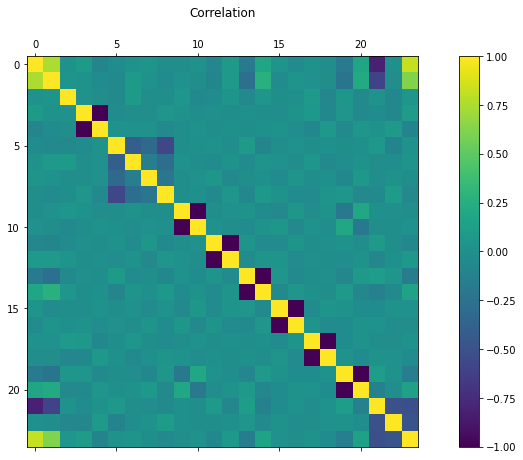

In [ ]:
# 10b. Show the correlation matrix as a heatmap

plt.figure(figsize=(15,7))
# matshow visualizes a matrix of numbers as colors
plt.matshow(bank_norm.corr(),fignum=1)

# We can see which colors correspond to which values with a colorbar
plt.colorbar()

# Sometimes it's useful to have a reference to the current figure object,
# which we can get with "get current figure" or gcf.
fig = plt.gcf()

# And sometimes it's useful to have a reference to the current axis object,
# which we can get with gca.
ax = plt.gca()

# Sometimes your title may overlap your tick labels.
# You can add padding to keep things readable.
plt.title('Correlation', pad=20)
plt.show()


10c. The few positive correlations can be seen with age group old and income, as well age group old and age. Age and income are also highly correlated, which makes sense, because on average, as you get older, your salary tends to go up. 

The negative correlations can be seen with age and age group young, which is obvious. As age goes up, less people will be in the age group young bin. Age group young and income are also negatively correlated, which makes sense for the same reason age and income are positively correlated.

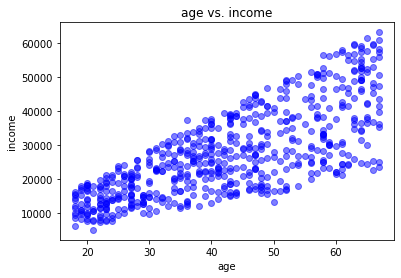

In [ ]:
# 11. Create a scatter plot of the (non-normalized) Income attribute relative to Age
age = df['age']
income = df['income']
plt.scatter(age, income, marker='o', color='b', alpha=0.5)
plt.xlabel('age')
plt.ylabel('income')
plt.title('age vs. income')
plt.show()

11a. Age and income definitely seem positively correlated. As age goes up, so would one's income

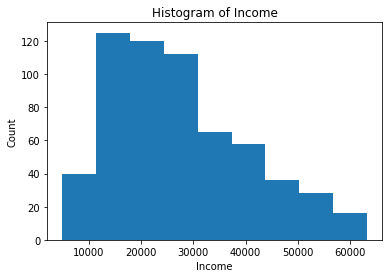

In [ ]:
#12. Create a histogram for (non-normalized) Income (using 9 bins) 
plt.hist(income, bins=9)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of Income')
plt.show()

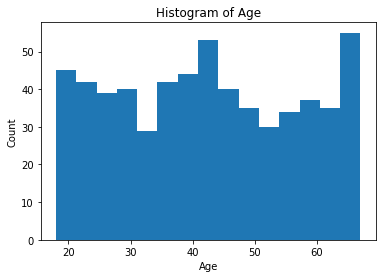

In [ ]:
#12. Create a histogram for Age (using 15 bins).
plt.hist(age, bins=15)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')
plt.show()

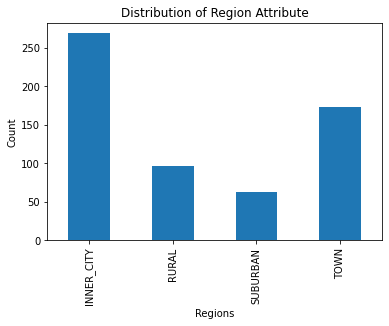

In [ ]:
# 13. Using a bar graph, plot the distribution of the values of the region attribute
plt.clf()
df.groupby('region').count().age.plot(kind='bar')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.title('Distribution of Region Attribute')
plt.show()

In [ ]:
# 14 a. Perform a cross-tabulation of the region attribute with the pep attribute
pd.crosstab(df.region,df.pep)

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


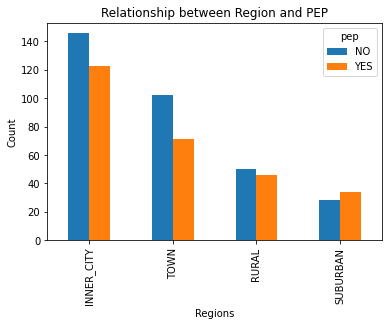

In [ ]:
# 14 b. Create a bar chart graph to visualize the relationships between these sets of variables
bar = pd.crosstab(df.region, df.pep,margins=True).sort_values('All',ascending=False)
bar= bar.drop('All',axis=1)
bar = bar.drop('All',axis=0)
bar.plot(kind='bar', stacked=False)
plt.title('Relationship between Region and PEP')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.show()

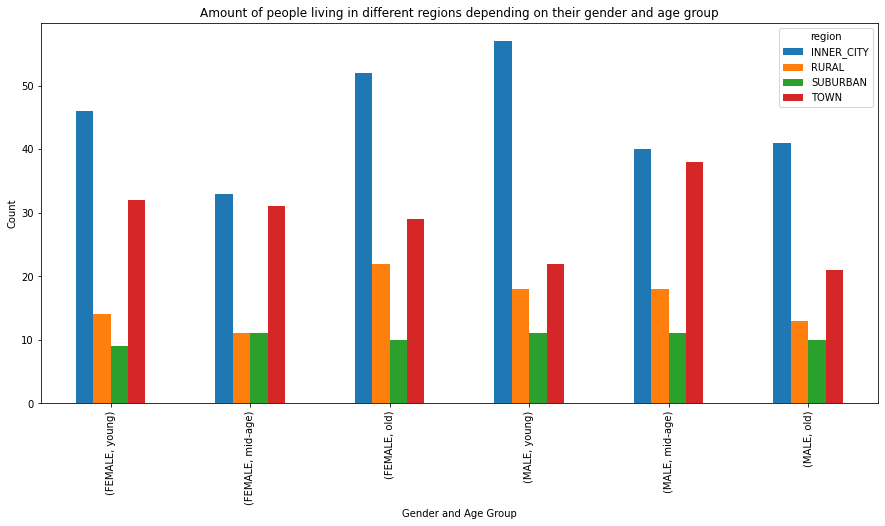

In [ ]:
#15
(df.groupby(['region','gender','ageGroup'])['region']
   .count().unstack('region').plot.bar(figsize=(15,7)))
plt.xlabel('Gender and Age Group')
plt.ylabel('Count')
plt.title('Amount of people living in different regions depending on their gender and age group')
plt.show()


From this visualization we can conclude that on average no matter the gender or age group, customers from this financial firm prefer to live in the inner-city. Additionally, young male significantly prefer to live in the inner-city compared to other regions. However, interesingly it appears as if both more males and females when they reach their mid-age prefer to live in town areas but the older age group prefers the inner-city. This information is beneficial for the financial firm since they can change their marketing depending on their customers demographics. Additionally, if they wanted to increase their customer base they could market more specifically at rural and suburban regions for all age groups, since there appears to already be an interest in the inner-city and town areas. 